1) Use your RGB to HSV function inside the nested pixel loop.
2) Apply to your image pipeline

Extra Credit
1) BGR to RGB function within the nested pixel loop
(flipping array dimensions, first and last)
2) apply it to your image pipeline

In [17]:
#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('../Images/frogsDining.jpeg')


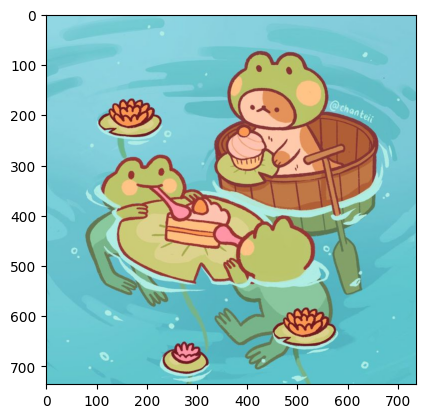

In [18]:
def convert_BGR(bgr):
    b = bgr[0][0][0]
    g = bgr[0][0][1]
    r = bgr[0][0][2]

    return np.array([[[r,g,b]]])

def bgr_to_rgb(img):
    des = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,img.shape[0]):
        #Search each pixel in the row
        for x in range(0,img.shape[1]):
            rgb = np.array([[[img[y,x,0],img[y,x,1],img[y,x,2]]]])
            des[y,x] = convert_BGR(rgb)

    return des

img = bgr_to_rgb(img)
plt.imshow(img)     

In [19]:
def rgb_to_hsv(rgb):

    rgb = rgb/255

    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    
    #finding max and min RGB values
    v = np.max(rgb)
    vMin = np.min(rgb)

    #saturation value
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    #calculate (v-vMin) for later use
    diff = (v - vMin)
   
    #are r,g,b equal
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
        h = 0
    #is the point within 60 degrees of red axis
    elif(rgb[0][0][0] == v):
        h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    #is point within 60 degrees of green axis
    elif(rgb[0][0][1] == v):
        h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    #is point within 60 degrees of blue axis   
    elif(rgb[0][0][2] == v):
        h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff

    #returning hsv values
    h = (round(h/2))
    s = np.interp(s,[0,1],[0,255])
    v = np.interp(v,[0,1],[0,255])
   
    return np.array([[[h,s,v]]])

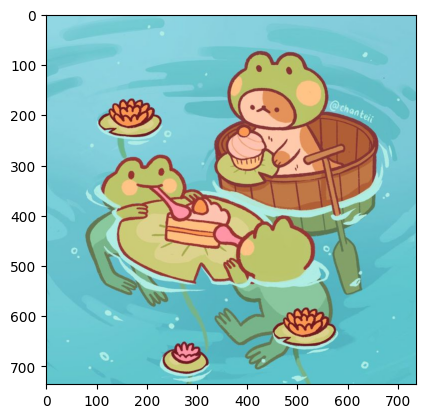

In [21]:
def img_rgb_to_hsv(img):

    des = np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,img.shape[0]):
        #Search each pixel in the row
        for x in range(0,img.shape[1]):
            # img[y,x,0] - Red img[y,x,1] - Green img[y,x,2] - Blue
            # des[y,x]
            rgb = np.array([[[img[y,x,2],img[y,x,1],img[y,x,0]]]])
            des[y,x] = rgb_to_hsv(rgb)

    return des

des = img_rgb_to_hsv(img)
des = cv2.cvtColor(des, cv2.COLOR_HSV2RGB)
plt.imshow(img) 